<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project2</h3>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

In [1]:
#گزارش نهایی درون فایل زیپ قرار دارد

In [ ]:
#The project is about churn modeling and its impact on our business.
#Our goal is to make a model for the marketing team who need to manage our customers in a way we earn most profit
#from them.
#(for exp. if our model predicts a person would leave our store our vendors can give them discounts or 
#any other special offers to keep them in our store.)
#For making the process easier for our marketing/sales team we can make a model based on the data
#and make a simple web app for easier use with a simple and good UX.
#(We should keep in mind that our marketing/sales team have no idea about ML, so it has to be as simple as possible.)

## Importing the libraries

In [4]:
#As always,our first step is importing all our libraries.
import pandas as pd
import numpy as np
import seaborn as sns
from pycaret.classification import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

## Load and Prepare Data

In [5]:
#We are provided with one dataset which is importet by pandas.
dataset = pd.read_csv("Churn.csv")

## EDA

In [6]:
#To get a simple insight about the dataset(columns and instances) we read 3 of the instances randomly.
dataset.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
798,799,15570134,Padovano,683,France,Female,35,6,187530.66,2,1,1,37976.36,0
4048,4049,15653715,Coates,602,France,Female,63,7,0.00,2,1,1,56323.21,0
1873,1874,15766686,Nebechi,659,Germany,Female,39,1,104502.11,1,1,0,20652.69,0


In [7]:
#The dataset is pretty straight forward and all columns are clear.
#The label for our model is "Exited" and we can get rid of some columns right now.
#(Because they have no use for us and just take up RAM :D )
del dataset["RowNumber"]
del dataset["CustomerId"]
del dataset["Surname"]

In [8]:
#Now we need to check data types of columns for encoding.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
#Two columns have "object" value which simply means string value.
#We will deal with those columns in the next step.
#Fortunately there is no null value in our dataset.
#(There are 10k instances and 10k non-null values.

## Data Preprocessing

In [10]:
#Our dataset is clean and we only need to scale and encode our dataset.
#I copy the dataset before encoding and scaling the data for better storytelling and visualization.
dataset2 = dataset.copy()

In [11]:
#For encoding the dataset I'll use one-hot-encoding(not label encoding),because theres
#no linear relation between "men" and "women", and different countries.
dataset = pd.get_dummies(dataset)

In [12]:
#Everything looks good and our last step is to scale the data.
#For easier understanding I turn the dataset back into pandas dataframe.
column_names = dataset.columns
dataset = MinMaxScaler().fit_transform(dataset)
dataset = pd.DataFrame(dataset,columns = column_names)
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0,1.0,0.0,0.0,0.0,1.0
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0,1.0,0.0,0.0,0.0,1.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,1.0,0.0,0.0,1.0,0.0
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0,0.0,1.0,0.0,0.0,1.0


In [13]:
#Now our dataset is ready for machine learning algorithms.

## Strorytelling - Visualization

In [14]:
#In this step we are going to plot our dataset in different kinds so we get a better understanding about our model.
#Who are our customers?Are most of the men or women?

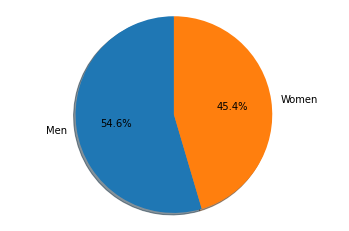

In [15]:
#male = dataset2.query('Gender == "Male"').values_counts()
male = dataset2["Gender"].value_counts().Male
female = dataset2["Gender"].value_counts().Female
sizes = [male/10000,female/10000]
labels = ["Men","Women"]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')  
plt.show()

In [16]:
#Who earns more money?Men or women?

In [17]:
male = dataset2.query('Gender == "Male"')
male = male["EstimatedSalary"].mean()
print("Mean of mens earnings : ",male)
female = dataset2.query('Gender == "Female"')
female = dataset2["EstimatedSalary"].mean()
print("Mean of womens earnings : ",female)

Mean of mens earnings :  99664.57693054806
Mean of womens earnings :  100090.2398809998


In [18]:
#It seems that women earn slightly more than men.
#What about our top 100 customers?Who are they?

In [19]:
top_customers = dataset2["EstimatedSalary"].sort_values(ascending=False).head(100)
top_customers = top_customers.index #These people are our top customers.
top_customers_list = dataset2.iloc[top_customers]
#These people are our top customers based on Salary.
top_customers_list

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6646,685,Spain,Female,42,2,0.00,2,0,0,199992.48,0
3580,639,Germany,Female,41,5,98635.77,1,1,0,199970.74,0
4417,608,Spain,Male,27,4,153325.10,1,1,1,199953.33,0
9096,569,France,Male,37,9,178755.84,1,1,0,199929.17,0
8926,620,France,Male,28,8,0.00,2,1,1,199909.32,0
5958,540,France,Female,40,3,165298.12,1,0,1,199862.75,0
1378,715,Spain,Female,35,4,40169.88,2,1,1,199857.47,0
6402,719,France,Male,36,3,155423.17,1,1,1,199841.32,0
8088,541,Germany,Female,39,9,100116.67,1,1,1,199808.10,1
6125,501,Germany,Female,34,7,93244.42,1,0,1,199805.63,0


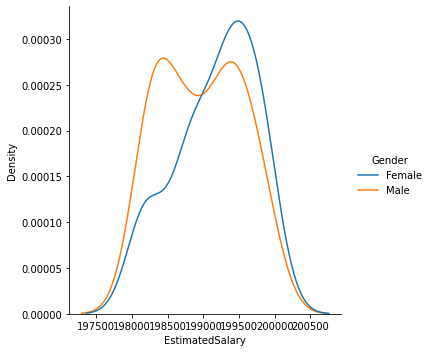

In [20]:
#Are our top customers male or female?
sns.displot(top_customers_list, x="EstimatedSalary", hue='Gender',kind="kde")

In [21]:
#Well, it seems that women are a bit ahead by Salary.

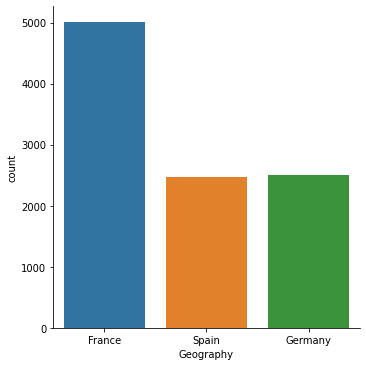

In [22]:
#What about country?Which nationality has the longest bank balance?
sns.catplot(x="Geography", kind="count", data=dataset2)

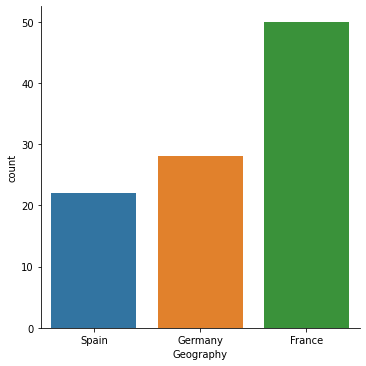

In [23]:
#Based on the full dataset french people are really rich!
#What about our top 100 customers?
sns.catplot(x="Geography", kind="count", data=top_customers_list)

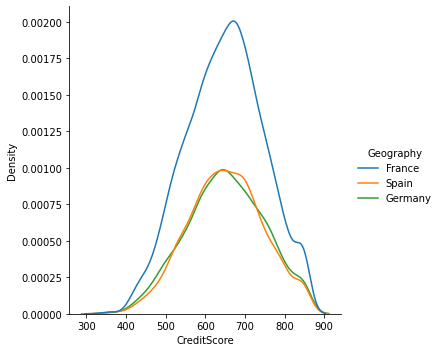

In [24]:
#For our last step, lets see which nationality has the best credit score and is most reliable?
sns.displot(dataset2, x="CreditScore", hue='Geography',kind="kde")

In [25]:
#My advice to our vendors or marketing team is that if someone enters our stores and has a french accent
#give special services to them ... .It is possible the person is/can be one of our top customers!

## Prepare Data for Machine learning

In [ ]:
#Whats the correlation between our attributes?
#Lets see!
#I'll use all attributes on my model.

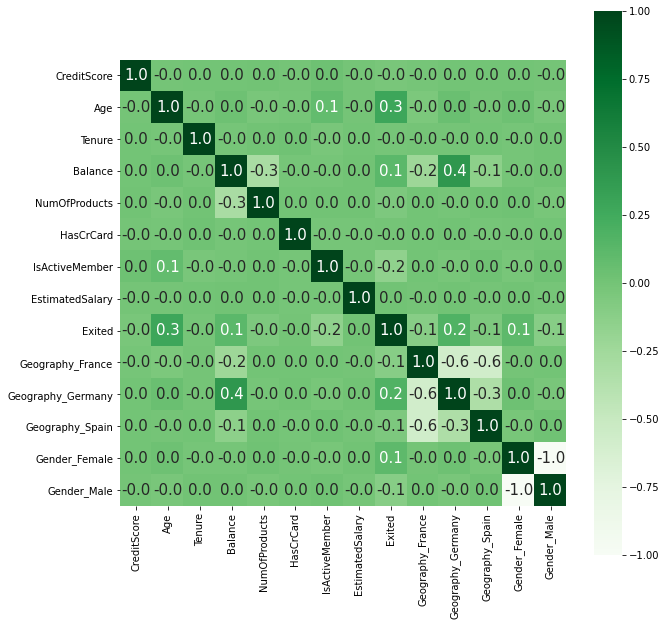

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [27]:
#Now its time for prepearing our model.
#For the rest of the program I'm gonna use pycaret.
#It's gonna do most of the job.

## Train your model

In [28]:
#I have done most of the pre processing myself.
#I could give the job to pycaret but prefered to do it myself.
#The only step to take for making a model is making the setup.
clf = setup(dataset,target="Exited")
#We dont need to tune this model because we tuned our dataset before using 
#as input into the model.

,Description,Value
0,session_id,3276
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(10000, 14)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


## Test the model and show the metrics

In [29]:
#Now that we have trained the model we can see which model performed best.
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8661,0.8502,0.4702,0.7872,0.5875,0.5138,0.5388,0.955
gbc,Gradient Boosting Classifier,0.8628,0.8666,0.4674,0.7702,0.5806,0.5046,0.5276,0.746
lightgbm,Light Gradient Boosting Machine,0.8628,0.8578,0.4955,0.7471,0.5952,0.5167,0.5329,0.185
ada,Ada Boost Classifier,0.8575,0.8479,0.4786,0.7312,0.5769,0.4959,0.5129,0.289
et,Extra Trees Classifier,0.8573,0.8449,0.4407,0.7574,0.5567,0.4787,0.5039,0.789
nb,Naive Bayes,0.8207,0.7830,0.3691,0.5987,0.4555,0.3555,0.3710,0.021
knn,K Neighbors Classifier,0.8201,0.7434,0.3214,0.6125,0.4207,0.3264,0.3506,0.142
lr,Logistic Regression,0.8117,0.7619,0.1986,0.6201,0.2985,0.2224,0.2716,0.320
lda,Linear Discriminant Analysis,0.8071,0.7650,0.2309,0.5653,0.3256,0.2364,0.2695,0.030
ridge,Ridge Classifier,0.8057,0.0000,0.1151,0.6226,0.1925,0.1388,0.2042,0.018


In [30]:
#As we can see Random Forest performed better than the other algorithms.

In [32]:
#What parameters were used for training this model?
top1 = compare_models(n_select=1)
top1

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8661,0.8502,0.4702,0.7872,0.5875,0.5138,0.5388,0.986
gbc,Gradient Boosting Classifier,0.8628,0.8666,0.4674,0.7702,0.5806,0.5046,0.5276,0.749
lightgbm,Light Gradient Boosting Machine,0.8628,0.8578,0.4955,0.7471,0.5952,0.5167,0.5329,0.191
ada,Ada Boost Classifier,0.8575,0.8479,0.4786,0.7312,0.5769,0.4959,0.5129,0.287
et,Extra Trees Classifier,0.8573,0.8449,0.4407,0.7574,0.5567,0.4787,0.5039,0.797
nb,Naive Bayes,0.8207,0.7830,0.3691,0.5987,0.4555,0.3555,0.3710,0.022
knn,K Neighbors Classifier,0.8201,0.7434,0.3214,0.6125,0.4207,0.3264,0.3506,0.141
lr,Logistic Regression,0.8117,0.7619,0.1986,0.6201,0.2985,0.2224,0.2716,0.366
lda,Linear Discriminant Analysis,0.8071,0.7650,0.2309,0.5653,0.3256,0.2364,0.2695,0.029
ridge,Ridge Classifier,0.8057,0.0000,0.1151,0.6226,0.1925,0.1388,0.2042,0.020


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3276, verbose=0,
                       warm_start=False)

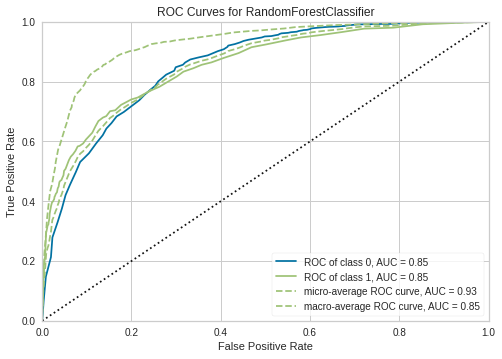

In [36]:
#Lets plot the model to gain an idea about random forests performance.
rf = create_model("rf")
plot_model(estimator=rf,plot="auc")

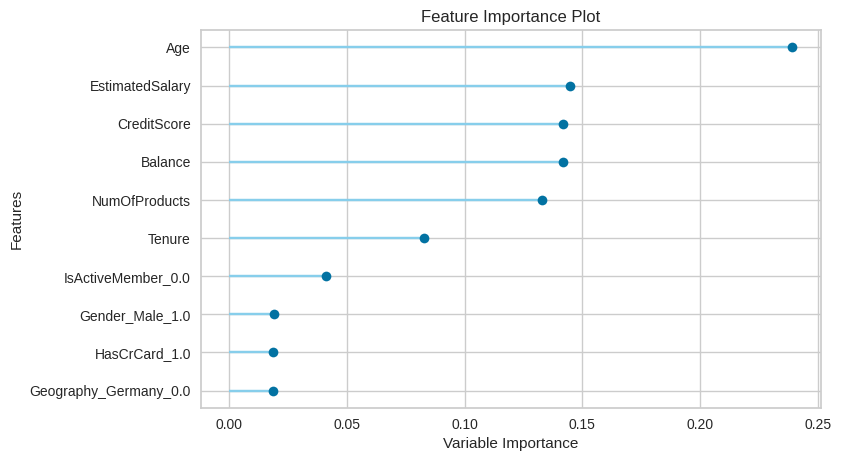

In [38]:
plot_model(estimator=rf,plot="feature")

In [41]:
#It seems that "age" is an importent factor for our prediction.
#As we have gussed "salary" ,"credit score" and "balance" are also very important
#for our prediction.

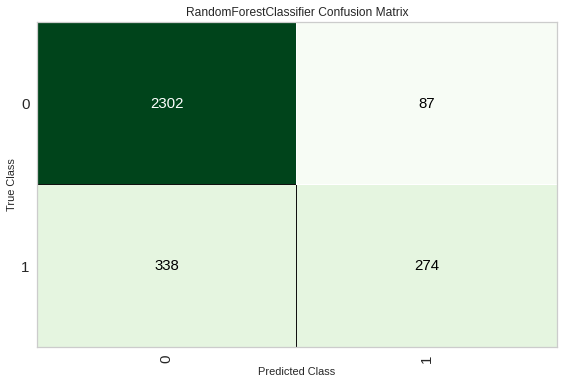

In [40]:
plot_model(estimator=rf,plot="confusion_matrix")

In [42]:
#Now we have a good and usefull model for prediction.

## Save your final model

In [ ]:
#I'm gonna save the model into a pickle file and use it for our webframework for
#the marketing/sales team.

In [43]:
save_model(rf,"ardalan_rf_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Exited',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l

In [44]:
#Now that my model is saved on an external file,
#I will make a new program with framework and 
#use this file in the program for prediction.

## Send us the Result (Maktabkhoone)